## Курсовая работа на тему: "Решение двумерной  стационарной задачи теплопроводности в пластине с различными физическими свойствами"
### Вариант 1.9
### Выполнили студенты группы А-05-20 **Белова Альбина и Мискарян Элла**

**Постановка задачи:** Рассматривается решение задачи Дирихле для уравнения Пуассона в прямоугольнике с граничными условиями 1-го рода. Функция источника f(x,y) действует только внутри заштрихованной области. Найти решение задачи. Конфигурация: прямоуольник внутри прямоугольника.
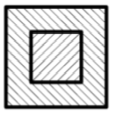

Уравнение теплопроводности имеет вид $$[p(x,y)u_{x}'(x,y)]_{x}' + [q(x,y)u_{y}'(x,y)]'_{y} = - f(x,y), \newline
u|_{Г} = \varphi(x,y).$$

#### Входные данные: 

$a,b$ - ширина и длина внешнего прямоугольника

$m,n$ - кол-во точек по горизонтали и вертикали

$x_1, y_1, x_2, y_2$  - левая верхняя и правая нижняя точки внутреннего прямоугольника

$f_1,f_2$ - функции источника для внешнего и внутреннего прямоугольника.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

def show_2d(x):
    #x = np.flip(x, 0)
    plt.figure(figsize = (6, 5))
    plt.imshow(x, cmap='coolwarm')
    plt.axis('off')
    plt.show()
    
def show_3d(im, x, y):
    #im = np.flip(im, 0)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(6,5))
    ax = plt.axes(projection='3d')
    mappable = ax.plot_surface(X, Y, im, alpha=0.5, cmap='coolwarm', linewidth=0, antialiased=False)
    fig.colorbar(mappable, shrink=0.5, aspect=5)
    plt.show()

In [24]:
eps = 1e-6
a = 1; b = 1 # длина и ширина внешней границы
m = 50; n = 50 # кол-во точек разбиения
h = a/m
border_y1 = n//4; border_x1 = m//4 # координаты 1 точки внутренней границы
border_y2 = n-border_y1-1; border_x2 = m-border_x1-1 # координаты 2 точки внутренней границы

def Zeidel(m, n, p, q, f1, f2, phi, eps):
    u = np.zeros((m, n))
    eps_cur = eps+1
    k = 1
    while eps_cur >= eps:
        k += 1
        u_old = u.copy()
        fill(u, p, q, f1, f2, phi)
        eps_cur = norm(u_old - u, ord = 2)
    return u, eps_cur

# filling in areas
def fill(u, p, q, f1, f2, phi):
    m = len(u)
    n = len(u[0])
    for i in range(m):
        for j in range(n):
            # external border
            if (i == 0) or (i == m-1) or (j == 0) or (j == n-1):
                u[i, j] = phi(i*h, j*h)
            else:
                # external area
                if ((((0 < i < border_x1) or (border_x2 < i < m-1)) and (0 < j < n-1))
                    or ((border_x1 <= i <= border_x2)and((0 < j < border_y1) or (border_y2 < j < n-1)))):
                    u[i, j] =  (h**2*f1(i*h, j*h))
                # internal area
                if (border_y1 < j < border_y2) and (border_x1 < i < border_x2):
                    u[i, j] =  (h**2*f2(i*h, j*h))
                # internal border
                if (((border_x1 <= i <= border_x2) and (border_y1 == j or border_y2 == j)) 
                    or ((border_y1 <= j <= border_y2) and (border_x1 == i or i == border_x2))):
                    u[i, j] =  h**2*(f1(i*h, j*h)+f2(i*h*h, j*h))/2

                u[i, j] += p((i-0.5)*h, j*h)*u[i-1,j] + p((i+0.5)*h,j*h)*u[i+1,j] + (
                    q(i*h, (j-0.5)*h)*u[i,j-1] + q(i*h, (j+0.5)*h)*u[i, j+1])
                u[i, j] /= p((i-0.5)*h, j*h) + p((i+0.5)*h,j*h) + q(i*h, (j-0.5)*h) + q(i*h, (j+0.5)*h)
            

def origin(f, m, n):
    v=np.zeros((n,m))
    for i in range(1, m-1):
        for j in range(1, n-1):
            v[i, j] = f(i*h,j*h)
    return v

## Тестовые примеры

In [25]:
def u_true(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

def phi(x, y):
    return 0

# test 1
def p1(x, y): return 1
def q1(x, y): return 1
def f1(x, y): return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

# test 2
def p2(x, y): return np.e**x
def q2(x, y): return np.e**x                    
def f2(x, y): return np.e**x*np.pi*np.sin(np.pi*y)*(2*np.pi*np.sin(np.pi*x)-np.cos(np.pi*x))

# test 3
def p3(x, y): return x
def q3(x, y): return np.e**y              
def f3(x, y):
    return -np.pi*(np.sin(np.pi*y)*(np.cos(np.pi*x)-np.pi*np.sin(np.pi*x)*(1+np.e**y))+np.e**y*np.sin(np.pi*x)*np.cos(np.pi*y))

In [26]:
p = (p1, p2, p3)
q = (q1, q2, q3)
f = (f1, f2, f3)

def arr_u():
    arr = []
    for i in range(len(f)):
        u = Zeidel(m, n, p[i], q[i], f[i], f[i], phi, eps)
        arr.append(u)
    return arr

matrix_true = origin(u_true, m, n)
arr = arr_u()

In [ ]:
u = Zeidel(30, 30, p1, q1, f1, f1, phi, eps)
print("Погрешность: ", max(abs(matrix_true.flatten() - u[0].flatten())))

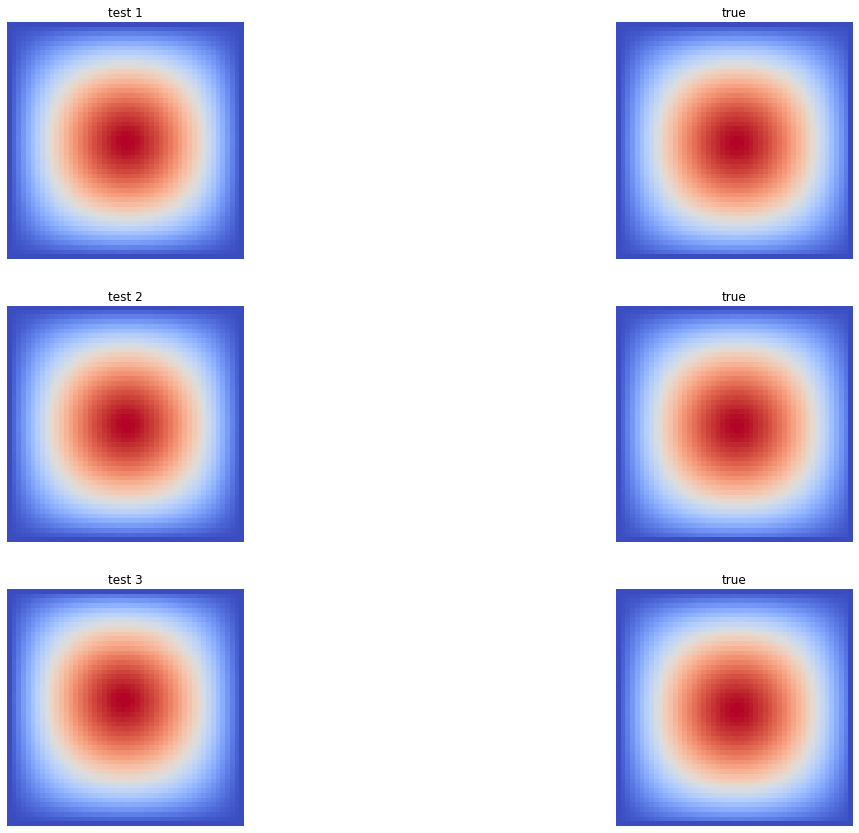

In [27]:
k = 0
plt.figure(figsize = ((20, 20)))

for u in arr:
    k += 1
    plt.subplot(4, 2, k)
    plt.imshow(u[0], cmap='coolwarm')
    plt.title(label = "test {}".format(k//2+1))
    plt.axis('off')
    k += 1
    plt.subplot(4, 2, k)
    plt.imshow(matrix_true, cmap='coolwarm')
    plt.title(label = "true")
    plt.axis('off')
    
plt.show()

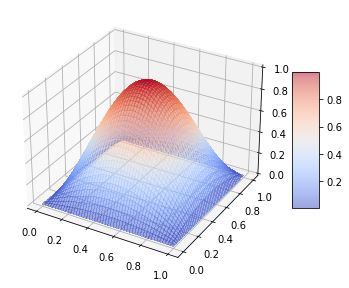

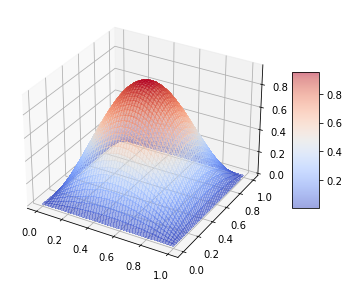

Погрешность:  0.0649754454859719
Погрешность:  2.3202246269115543
Погрешность:  1.985439936355034
Погрешность:  2.3307434537307308
Погрешность:  9.960014916363732e-07


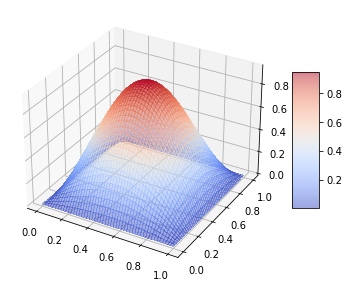

Погрешность:  0.07099480543306935
Погрешность:  2.5132659148421164
Погрешность:  2.1570181447857224
Погрешность:  2.527281580343471
Погрешность:  9.97088749972646e-07


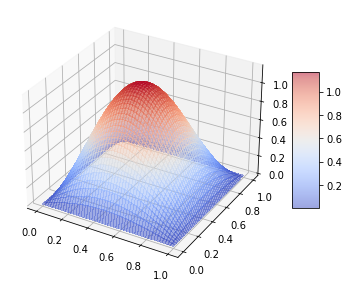

Погрешность:  0.20791628838052711
Погрешность:  5.942595004483733
Погрешность:  4.526633637862065
Погрешность:  5.75706083534115
Погрешность:  9.969384950779856e-07


In [28]:
show_3d(matrix_true, np.linspace(0, 1, m), np.linspace(0, 1, n))
for i in range(len(arr)):
    show_3d(arr[i][0], np.linspace(0, 1, m), np.linspace(0, 1, n))
    print("Погрешность: ", max(abs(matrix_true.flatten() - arr[i][0].flatten())))

## Вычислительный эксперимент

In [29]:
def f4_2(x, y): return -2*((y**2-2*y) + (x**2-3*x))
def f4_1(x, y): return 0

def f5_2(x, y): return -2*((y**2-2*y) + (x**2-3*x))
def f5_1(x, y): return -3*((1-x)**2+2*(1-y)**4) - x**6 -6*y**3

def f6_2(x, y): return np.cos(np.pi*x+y)**5
def f6_1(x, y): return np.cos(np.pi*x+y)**5

f_exp = (f4_1, f4_2, f5_1, f5_2, f6_1, f6_2)

def arr_u_exper():
    arr = []
    for i in range(0, len(f_exp)-1, 2):
        u = Zeidel(m, n, p1, q1, f_exp[i], f_exp[i+1], phi, eps)
        arr.append(u)
    return arr

arr_exp = arr_u_exper()

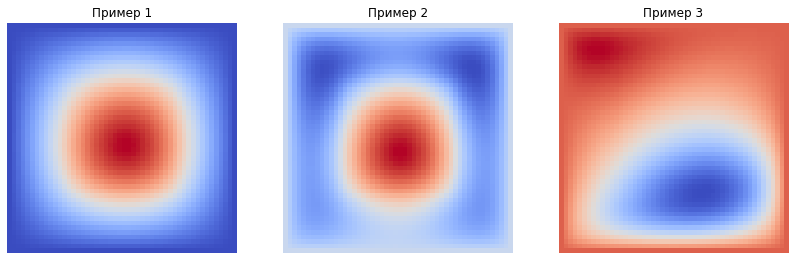

In [30]:
k = 0
plt.figure(figsize = ((14, 12)))

for u in arr_exp:
    k += 1
    plt.subplot(1, 3, k)
    plt.imshow(u[0], cmap='coolwarm')
    plt.title(label = "Пример {}".format(k))
    plt.axis('off')
    
plt.show()

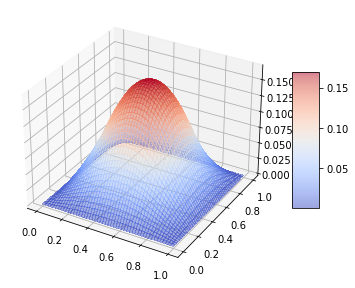

Погрешность:  9.983965653986476e-07


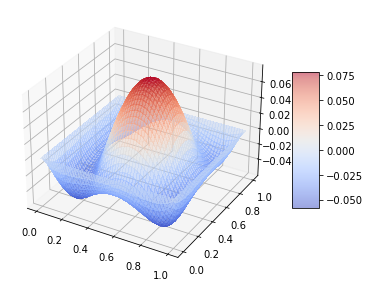

Погрешность:  9.970581790557233e-07


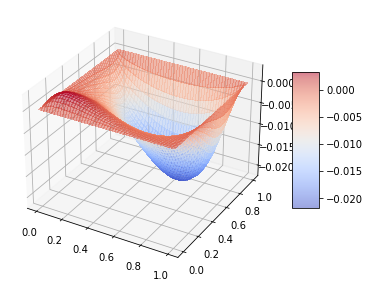

Погрешность:  9.962501088996101e-07


In [31]:
for i in range(len(arr_exp)):
    show_3d(arr_exp[i][0], np.linspace(0, 1, m), np.linspace(0, 1, n))
    print("Погрешность: ", arr_exp[i][1])

In [32]:
def f7(x, y): return -10
def phi7(x, y): return 15

u7 = Zeidel(m, n, p1, q1, f7, f7, phi7, eps)

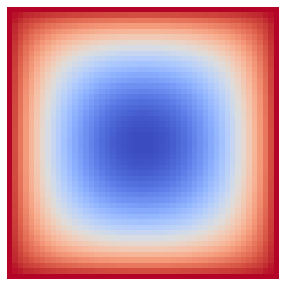

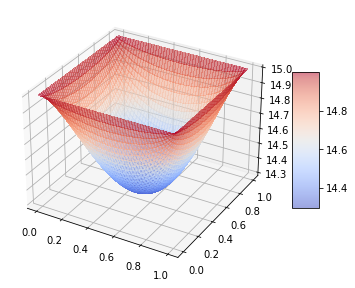

In [33]:
show_2d(u7[0])
show_3d(u7[0], np.linspace(0, 1, m), np.linspace(0, 1, n))

In [37]:
for n in (10, 20, 30, 40, 50, 100):
    u = Zeidel(n, n, p1, q1, f1, f1, phi, eps)
    matrix_true = origin(u_true, n, n)
    print("Погрешность: ", max(abs(matrix_true.flatten() - u[0].flatten())))
    #arr_h.append(h)
    

Погрешность:  0.2305317596533732
Погрешность:  0.8104401771303731
Погрешность:  0.951145300469856
Погрешность:  0.6147917863421941
Погрешность:  0.0649754454859719
Погрешность:  0.059939386908253164
